In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt #visualisation 

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('asylum-applications.csv')

In [4]:
df.head()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Albania,Austria,ALB,AUT,G,N,FA,P,63
1,2018,Albania,Belgium,ALB,BEL,G,N,FI,P,505
2,2018,Albania,Belgium,ALB,BEL,G,R,RA,P,165
3,2018,Albania,Cyprus,ALB,CYP,G,N,FI,P,5
4,2018,Albania,Czechia,ALB,CZE,G,N,FI,P,5


In [5]:
df.tail()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
3493,2023,Ukraine,Sweden,UKR,SWE,G,A,AR,P,7
3494,2023,Ukraine,Sweden,UKR,SWE,G,N,FI,P,232
3495,2023,Ukraine,Sweden,UKR,SWE,G,R,RA,P,40
3496,2023,Ukraine,Switzerland,UKR,CHE,G,N,FI,P,17
3497,2023,Ukraine,Türkiye,UKR,TUR,G,N,FI,P,520


In [6]:
df.shape

(3498, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [8]:
df.describe()

,Year,applied
count,3498.000000,3498.000000
mean,2020.489423,305.375071
std,1.717220,1963.590716
min,2018.000000,5.000000
25%,2019.000000,6.000000
50%,2021.000000,22.000000
75%,2022.000000,117.000000
max,2023.000000,100758.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [11]:
df = df.drop_duplicates()
df.head(10)

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
0,2018,Albania,Austria,ALB,AUT,G,N,FA,P,63
1,2018,Albania,Belgium,ALB,BEL,G,N,FI,P,505
2,2018,Albania,Belgium,ALB,BEL,G,R,RA,P,165
3,2018,Albania,Cyprus,ALB,CYP,G,N,FI,P,5
4,2018,Albania,Czechia,ALB,CZE,G,N,FI,P,5
5,2018,Albania,Denmark,ALB,DNK,G,N,FI,P,78
6,2018,Albania,Finland,ALB,FIN,G,N,FI,P,36
7,2018,Albania,Finland,ALB,FIN,G,R,RA,P,5
8,2018,Albania,France,ALB,FRA,G,A,AR,P,4262
9,2018,Albania,France,ALB,FRA,G,N,FI,P,8311


In [12]:
df.tail()

,Year,Country of origin,Country of asylum,Country of origin (ISO),Country of asylum (ISO),Authority,Application type,Stage of procedure,Cases / Persons,applied
3493,2023,Ukraine,Sweden,UKR,SWE,G,A,AR,P,7
3494,2023,Ukraine,Sweden,UKR,SWE,G,N,FI,P,232
3495,2023,Ukraine,Sweden,UKR,SWE,G,R,RA,P,40
3496,2023,Ukraine,Switzerland,UKR,CHE,G,N,FI,P,17
3497,2023,Ukraine,Türkiye,UKR,TUR,G,N,FI,P,520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


# Dealing with missing data in dataset

In [14]:
df.isnull().sum()

Year                        0
Country of origin           0
Country of asylum           0
Country of origin (ISO)     0
Country of asylum (ISO)     0
Authority                   0
Application type            0
Stage of procedure         65
Cases / Persons             0
applied                     0
dtype: int64

In [15]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a","na"," ","--","nan","UnKnown","Na","unknown"]
df= pd.read_csv("asylum-applications.csv", na_values = missing_value_formats)

In [16]:
df = df.dropna(axis = 1, how ='all')

In [17]:
df.isnull().sum()

Year                        0
Country of origin           0
Country of asylum           0
Country of origin (ISO)     0
Country of asylum (ISO)     0
Authority                   0
Application type            0
Stage of procedure         65
Cases / Persons             0
applied                     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3498 non-null   int64 
 1   Country of origin        3498 non-null   object
 2   Country of asylum        3498 non-null   object
 3   Country of origin (ISO)  3498 non-null   object
 4   Country of asylum (ISO)  3498 non-null   object
 5   Authority                3498 non-null   object
 6   Application type         3498 non-null   object
 7   Stage of procedure       3433 non-null   object
 8   Cases / Persons          3498 non-null   object
 9   applied                  3498 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 273.4+ KB


In [19]:
df = df[df['Stage of procedure'] != ' ']

In [20]:
df = df[df['Stage of procedure'] != 'nan']

In [21]:
df.isnull().sum()

Year                        0
Country of origin           0
Country of asylum           0
Country of origin (ISO)     0
Country of asylum (ISO)     0
Authority                   0
Application type            0
Stage of procedure         65
Cases / Persons             0
applied                     0
dtype: int64

# Some visuals of initial dataset

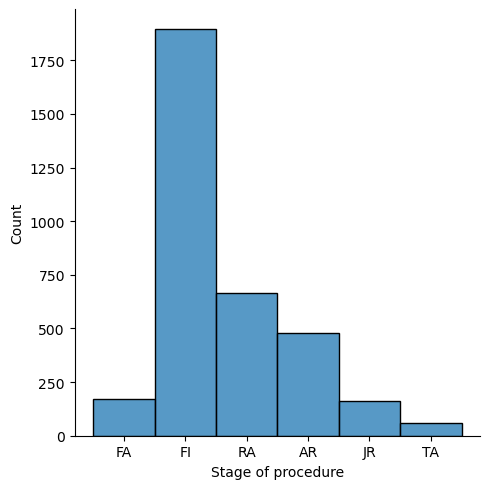

In [22]:
sns.displot(df["Stage of procedure"])

<Axes: xlabel='applied'>

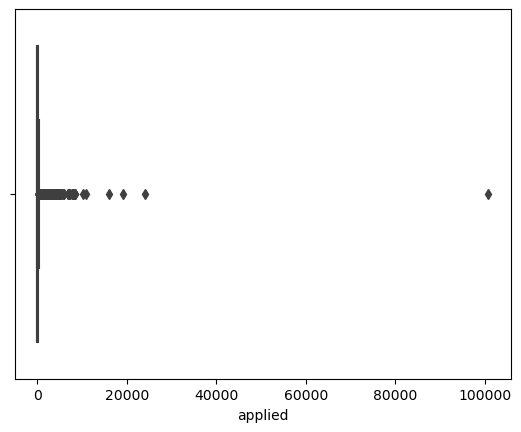

In [23]:
sns.boxplot(x=df["applied"])

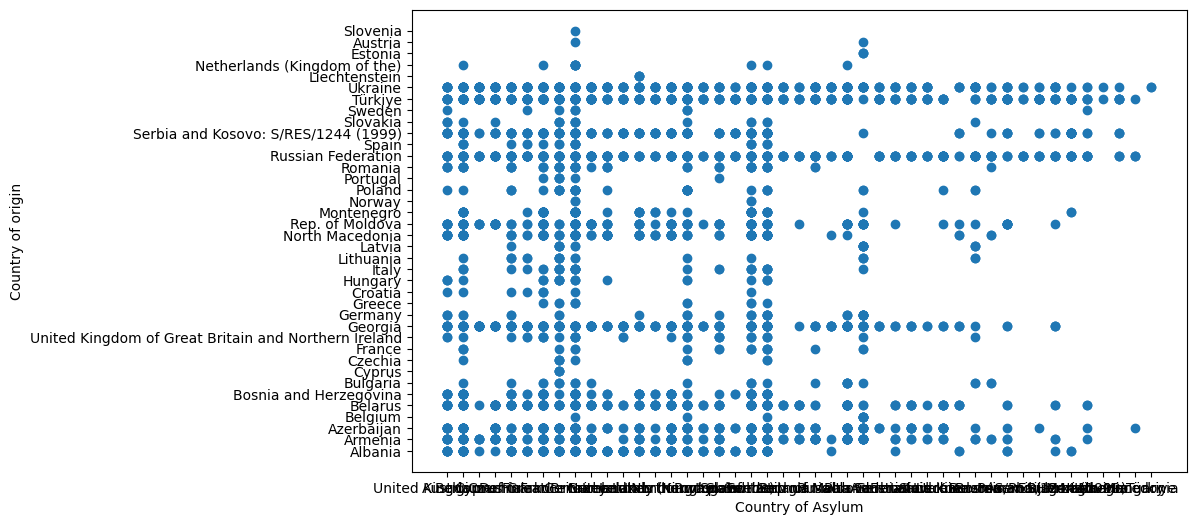

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["Country of asylum"], df["Country of origin"])
ax.set_xlabel("Country of Asylum")
ax.set_ylabel("Country of origin")
plt.show()

# Data Preperation

In [ ]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df = df.apply(le.fit_transform)

# Modelling and Evaluation

In [ ]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = df.drop('applied',axis=1)

# Putting response variable to y
y = df['applied']

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

In [ ]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

In [ ]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

In [ ]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
# accuracy score
clf_gini.score(X_test,y_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [ ]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [ ]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))